In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk import FreqDist
import nltk
import os

In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshararavishankar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshararavishankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/akshararavishankar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Topic Modeling

#### Reading and preprocessing data of 50 files

In [19]:
import os
path=os.listdir('.')
#print(path)
file_list=[]
for i in range(0,55):
    #file_name= list(filter(lambda x: x.startswith(str(i)),path))
    file_name= list(filter(lambda x: x.split(' ')[0]==str(i), path))
    if file_name:
        print(file_name)
        file_list.append(file_name[0])


["1 McDonald's.pdf-all_items_item_5.txt"]
['3 KFC.pdf-all_items_item_5.txt']
['4 Burger King.pdf-all_items_item_5.txt']
['5 Ace Hardware.pdf-all_items_item_5.txt']
['6 Chick-fil-A.pdf-all_items_item_5.txt']
['7 Subway.pdf-all_items_item_5.txt']
["8 Domino's.pdf-all_items_item_5.txt"]
['9 Circle K.pdf-all_items_item_5.txt']
['10 Taco Bell.pdf-all_items_item_5.txt']
["11 Wendy's.pdf-all_items_item_5.txt"]
['12 Pizza Hut.pdf-all_items_item_5.txt']
['13 REMAX.pdf-all_items_item_5.txt']
["14 Dunkin'.pdf-all_items_item_5.txt"]
['15 Keller Williams.pdf-all_items_item_5.txt']
['16 Tim Hortons.pdf-all_items_item_5.txt']
['17 Panera Bread.pdf-all_items_item_5.txt']
['18 Popeyes Louisiana Kitchen.pdf-all_items_item_5.txt']
['19 Dairy Queen.pdf-all_items_item_5.txt']
['20 Sonic Drive-In.pdf-all_items_item_5.txt']
['21 Little Caesars.pdf-all_items_item_5.txt']
["22 Papa John's.pdf-all_items_item_5.txt"]
["23 Arby's.PDF-all_items_item_5.txt"]
['24 Applebees.pdf-all_items_item_5.txt']
['25 Express Em

In [20]:
file_list.sort(key=lambda x: int(x.split(' ')[0]))

In [21]:

file_list

["1 McDonald's.pdf-all_items_item_5.txt",
 '3 KFC.pdf-all_items_item_5.txt',
 '4 Burger King.pdf-all_items_item_5.txt',
 '5 Ace Hardware.pdf-all_items_item_5.txt',
 '6 Chick-fil-A.pdf-all_items_item_5.txt',
 '7 Subway.pdf-all_items_item_5.txt',
 "8 Domino's.pdf-all_items_item_5.txt",
 '9 Circle K.pdf-all_items_item_5.txt',
 '10 Taco Bell.pdf-all_items_item_5.txt',
 "11 Wendy's.pdf-all_items_item_5.txt",
 '12 Pizza Hut.pdf-all_items_item_5.txt',
 '13 REMAX.pdf-all_items_item_5.txt',
 "14 Dunkin'.pdf-all_items_item_5.txt",
 '15 Keller Williams.pdf-all_items_item_5.txt',
 '16 Tim Hortons.pdf-all_items_item_5.txt',
 '17 Panera Bread.pdf-all_items_item_5.txt',
 '18 Popeyes Louisiana Kitchen.pdf-all_items_item_5.txt',
 '19 Dairy Queen.pdf-all_items_item_5.txt',
 '20 Sonic Drive-In.pdf-all_items_item_5.txt',
 '21 Little Caesars.pdf-all_items_item_5.txt',
 "22 Papa John's.pdf-all_items_item_5.txt",
 "23 Arby's.PDF-all_items_item_5.txt",
 '24 Applebees.pdf-all_items_item_5.txt',
 '25 Express Em

In [22]:
folder_name='.'
path=os.listdir(folder_name)
data_files=[]
for file in file_list:
    #file_path =   folder_name +'/' + file # Replace with your file path
    #print(file_path)
    try:
        file_r = open(file, 'r')
        data_files.append(file_r.read().replace('\n', ' '))
    except:
        print('file read error')



In [23]:
df_files_orig=pd.DataFrame({'File name':file_list, 'Text':data_files})

In [24]:
len(data_files)

50

In [25]:
df_files_orig.dtypes

File name    object
Text         object
dtype: object

In [26]:
df_files_orig

,File name,Text
0,1 McDonald's.pdf-all_items_item_5.txt,Item 5 Initial Fees All franchisees pay a $45...
1,3 KFC.pdf-all_items_item_5.txt,ITEM 5 INITIAL FEES Franchise Agreement Initia...
2,4 Burger King.pdf-all_items_item_5.txt,ITEM 5 INITIAL FEES Franchise Fee The standard...
3,5 Ace Hardware.pdf-all_items_item_5.txt,ITEM 5 INITIAL FEES Affiliation Fee The affil...
4,6 Chick-fil-A.pdf-all_items_item_5.txt,Item 5 INITIAL FEES Chick-fil-A does not cha...
5,7 Subway.pdf-all_items_item_5.txt,Item 5 INITIAL FEES All franchise fees are pa...
6,8 Domino's.pdf-all_items_item_5.txt,Item 5: Initial Fees Depending upon the typ...
7,9 Circle K.pdf-all_items_item_5.txt,ITEM 5 INITIAL FEES Initial Franchise Fee If y...
8,10 Taco Bell.pdf-all_items_item_5.txt,Item 5 INITIAL FEES The initial license fee...
9,11 Wendy's.pdf-all_items_item_5.txt,ITEM 5 INITIAL FEES If you are new to the Wen...


In [27]:
df_files_orig.to_csv('data files.csv')

In [28]:
import spacy
import re

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def preprocess_and_lemmatize(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Process the text
    doc = nlp(text)

    # Preprocess and lemmatize
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop]

    return ' '.join(lemmatized_tokens)

# Example usage
# text = "The quick brown foxes are jumping over the lazy dogs."
# result = preprocess_and_lemmatize(text)
# print(result)
df_files = df_files_orig.copy()
df_files['Text'] = df_files_orig['Text'].apply(lambda x: preprocess_and_lemmatize(x))

In [30]:
df_files

,File name,Text
0,1 McDonald's.pdf-all_items_item_5.txt,item initial fee franchisee pay lump sum initi...
1,3 KFC.pdf-all_items_item_5.txt,item initial fee franchise agreement initial f...
2,4 Burger King.pdf-all_items_item_5.txt,item initial fee franchise fee standard franch...
3,5 Ace Hardware.pdf-all_items_item_5.txt,item initial fee affiliation fee affiliation f...
4,6 Chick-fil-A.pdf-all_items_item_5.txt,item initial fee chickfila charge initial lice...
5,7 Subway.pdf-all_items_item_5.txt,item initial fee franchise fee payable sign fr...
6,8 Domino's.pdf-all_items_item_5.txt,item initial fee depend type store develop pur...
7,9 Circle K.pdf-all_items_item_5.txt,item initial fee initial franchise fee sign fr...
8,10 Taco Bell.pdf-all_items_item_5.txt,item initial fee initial license fee express u...
9,11 Wendy's.pdf-all_items_item_5.txt,item initial fee new wendys system sign prelim...


### Bag of Words and LDA Model

In [31]:
text_list=df_files['Text'].apply(lambda x:x.split(' '))


In [32]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc


# Create a dictionary from the preprocessed data

dictionary = Dictionary(text_list)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in text_list]

# Train the LDA model
num_topics = 6
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=50, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['center', 'license', 'transfer', 'discount', 'document', 'complete', 'lease', 'operator', 'option', 'inventory']
Topic: 1
Words: ['deposit', 'system', 'note', 'equipment', 'renewal', 'price', 'option', 'veteran', 'compliance', 'qualify']
Topic: 2
Words: ['nro', 'traditional', 'qualify', 'store', 'march', 'multibrand', 'territory', 'participate', 'marketing', 'amendment']
Topic: 3
Words: ['center', 'franchised', 'service', 'market', 'expense', 'product', 'system', 'attend', 'supply', 'refund']
Topic: 4
Words: ['deposit', 'exhibit', 'area', 'marketing', 'month', 'franchised', 'store', 'transfer', 'lease', 'document']
Topic: 5
Words: ['area', 'company', 'construction', 'service', 'real', 'estate', 'dollar', 'estimate', 'prior', 'management']


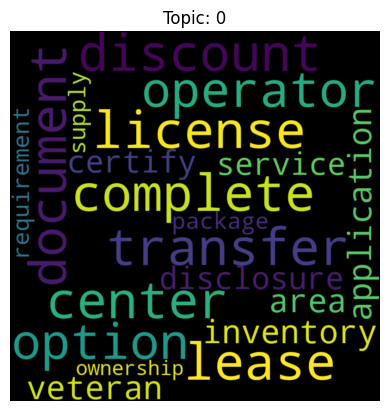

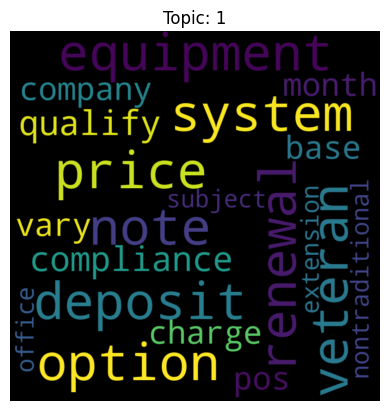

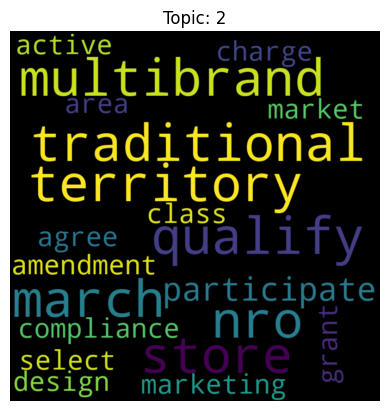

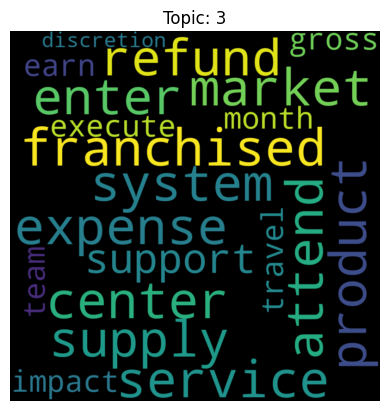

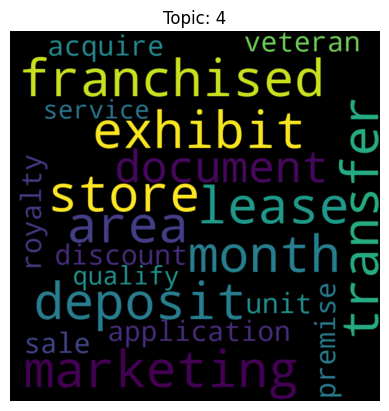

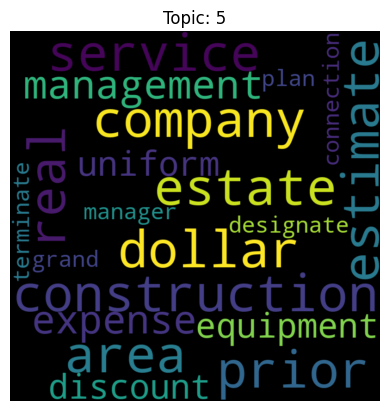

In [33]:
# Plotting a wordcloud of the topics

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

## TFIDF and LDA

In [34]:
import gensim

from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases

import gensim.corpora as corpora

from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [35]:
# Create Dictionary
data_lemmatized=list(text_list.values)
id2word = corpora.Dictionary(data_lemmatized)
print('Total Vocabulary Size:', len(id2word))

#text=list(df_files['Text'].values)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
dictionary = Dictionary(data_lemmatized)

Total Vocabulary Size: 2580


Filter out most common and least common words

In [36]:
#create a dictionary and then convert it to a dataframe that shows each word in the corpus and its frequency
# check word frequencies in the corpus and filter out high-frequency words that are over
#a certain threshold.
#Since these are generally corpus specific or general writing words, they don’t help much to cluster topics.

dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
            if id2word[idx] in dict_corpus:
                dict_corpus[id2word[idx]] += freq
            else:
                dict_corpus[id2word[idx]] = freq
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

# top 200 high-frequency words in descending order.
dict_df.sort_values('freq', ascending=False).head(200)

,freq
fee,1443
franchise,1323
agreement,928
restaurant,847
initial,754
...,...
fund,27
sell,27
grand,27
opportunity,27


In [37]:
from gensim import corpora
from gensim import models

In [38]:
remove_words=list(dict_df[(dict_df['freq']>900) | (dict_df['freq']<3)].index)

In [39]:
# Function to filter out most common words from a document
def filter_common_words(doc, common_words):
    return [(idx, freq) for idx, freq in doc if id2word[idx] not in common_words]

# Filter the corpus
filtered_corpus = [filter_common_words(doc, remove_words) for doc in corpus]

In [40]:
print('Number of words removed after filtering highly frequent and very less frequent words:',len(remove_words))


Number of words removed after filtering highly frequent and very less frequent words: 1415


In [41]:
# id2word.filter_extremes(no_below=5, no_above=0.9)
# filtered_corpus = [id2word.doc2bow(text) for text in data_lemmatized]

In [42]:
# Get all unique word indices from the filtered corpus
unique_indices = set(idx for doc in filtered_corpus for idx, _ in doc)

# Create a new dictionary with only the words that remain after filtering
filtered_id2word = {idx: id2word[idx] for idx in unique_indices}

# If you need a gensim Dictionary object instead of a regular Python dictionary:

filtered_dictionary = corpora.Dictionary()
filtered_dictionary.id2token = filtered_id2word
filtered_dictionary.token2id = {v: k for k, v in filtered_id2word.items()}

In [43]:
#create TFIDF corpus

model_tfidf = models.TfidfModel(filtered_corpus)
corpus_tfidf = model_tfidf[filtered_corpus]

In [44]:
lda_model_tfidf = gensim.models.ldamodel.LdaModel(
    corpus=corpus_tfidf,
    id2word=id2word,
    chunksize=100,
    alpha=10,
    eta=0.2,
    iterations=400,
    num_topics=5,
    passes=100,
    per_word_topics=True,
    eval_every=None,
    random_state =42)

In [46]:

pyLDAvis.enable_notebook()
vis_data =gensimvis.prepare(lda_model_tfidf, filtered_corpus, id2word)
# Show the visualization in the notebook
pyLDAvis.save_html(vis_data, 'output_LDA.html')
pyLDAvis.display(vis_data)


/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38245) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38245) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38245) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=38245) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/akshararavish

In [48]:
lda_model_tfidf.show_topics(formatted=False)

[(0,
  [('training', 0.00280718),
   ('license', 0.0026989407),
   ('veteran', 0.0025110508),
   ('system', 0.002207228),
   ('office', 0.0018034762),
   ('new', 0.0018004642),
   ('vetfran', 0.0017756377),
   ('inventory', 0.0017382049),
   ('service', 0.0017062704),
   ('associate', 0.001691743)]),
 (1,
  [('restaurant', 0.008361069),
   ('mtra', 0.002085753),
   ('equipment', 0.001908814),
   ('adq', 0.0018424944),
   ('territory', 0.0018416254),
   ('develop', 0.0017269889),
   ('kfcllc', 0.0016255075),
   ('midas', 0.0016201433),
   ('satellite', 0.0015978978),
   ('applicant', 0.0015594243)]),
 (2,
  [('development', 0.004058341),
   ('deposit', 0.0031605663),
   ('incentive', 0.0030566433),
   ('discount', 0.0026156474),
   ('area', 0.0025581254),
   ('company', 0.0025443202),
   ('purchase', 0.0023695873),
   ('shop', 0.0023664087),
   ('location', 0.0020350053),
   ('traditional', 0.002008924)]),
 (3,
  [('center', 0.0048395684),
   ('nro', 0.0021703998),
   ('program', 0.0020

In [49]:

from gensim.models.coherencemodel import CoherenceModel

# Perplexity
perplexity = lda_model_tfidf.log_perplexity(filtered_corpus)


# Get topics
num_topics = lda_model_tfidf.num_topics
topics = []
# To get the topic words from the model

for topic_id, topic in lda_model_tfidf.show_topics(num_topics=10, formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)
topics[:2]



# Calculate coherence
coherence_model = CoherenceModel(model=lda_model_tfidf, dictionary=filtered_dictionary,texts=data_lemmatized, coherence='c_v')

coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")



Coherence Score: 0.45846557508219127


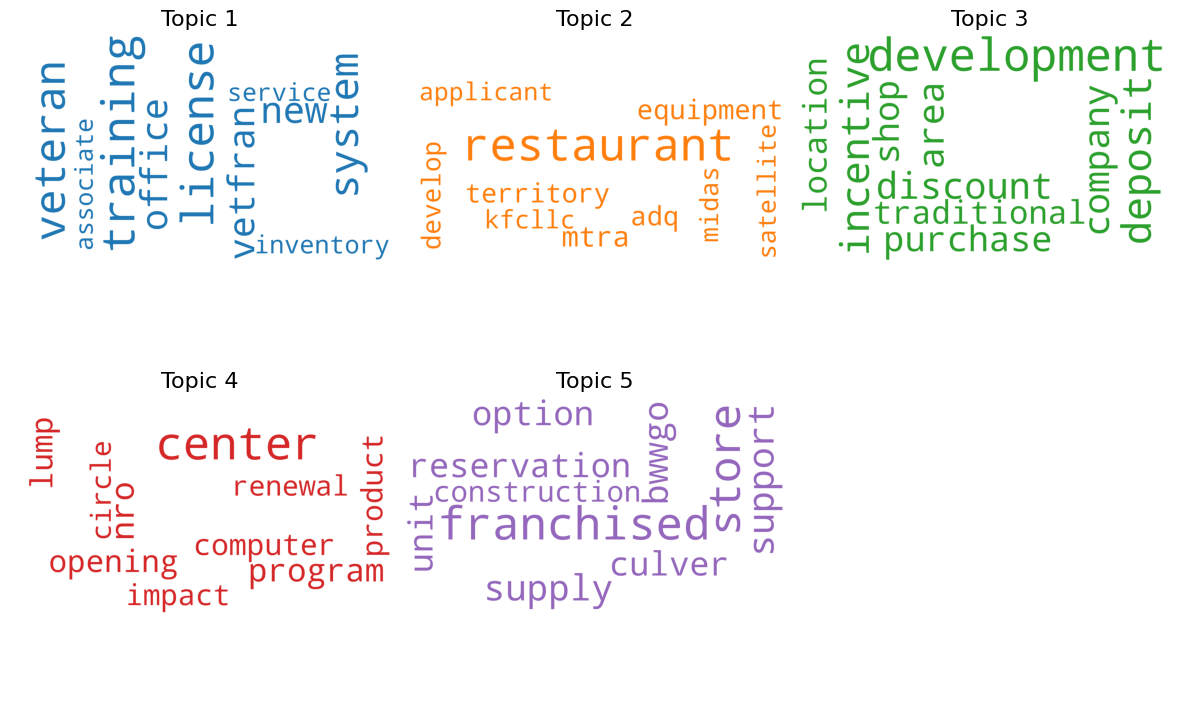

In [50]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
stop_words = set(STOPWORDS)
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1500,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=0.5)


topics = lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    if i in range(len(topics)):
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
      plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [51]:
print(lda_model_tfidf.print_topics())


[(0, '0.003*"training" + 0.003*"license" + 0.003*"veteran" + 0.002*"system" + 0.002*"office" + 0.002*"new" + 0.002*"vetfran" + 0.002*"inventory" + 0.002*"service" + 0.002*"associate"'), (1, '0.008*"restaurant" + 0.002*"mtra" + 0.002*"equipment" + 0.002*"adq" + 0.002*"territory" + 0.002*"develop" + 0.002*"kfcllc" + 0.002*"midas" + 0.002*"satellite" + 0.002*"applicant"'), (2, '0.004*"development" + 0.003*"deposit" + 0.003*"incentive" + 0.003*"discount" + 0.003*"area" + 0.003*"company" + 0.002*"purchase" + 0.002*"shop" + 0.002*"location" + 0.002*"traditional"'), (3, '0.005*"center" + 0.002*"nro" + 0.002*"program" + 0.002*"opening" + 0.002*"lump" + 0.002*"computer" + 0.002*"product" + 0.002*"impact" + 0.002*"circle" + 0.002*"renewal"'), (4, '0.003*"franchised" + 0.003*"store" + 0.002*"support" + 0.002*"supply" + 0.002*"bwwgo" + 0.002*"option" + 0.002*"reservation" + 0.002*"unit" + 0.002*"culver" + 0.002*"construction"')]


In [52]:
lda_model_tfidf.get_topics()

array([[0.00037154, 0.00034105, 0.00041784, ..., 0.00034105, 0.00034105,
        0.00034105],
       [0.00037552, 0.00034637, 0.00044241, ..., 0.00034637, 0.00034637,
        0.00034637],
       [0.0009993 , 0.00034061, 0.00045248, ..., 0.00034061, 0.00034061,
        0.00034061],
       [0.00037484, 0.00034618, 0.00043503, ..., 0.00034618, 0.00034618,
        0.00034618],
       [0.00037763, 0.00034524, 0.0004363 , ..., 0.00034524, 0.00034524,
        0.00034524]], dtype=float32)

In [53]:
print([len(doc) for doc in filtered_corpus[:10]])


[53, 110, 241, 148, 40, 373, 94, 190, 156, 216]


In [54]:
for i in range(5):
    print(lda_model_tfidf.get_document_topics(filtered_corpus[i], minimum_probability=0.0))


[(0, 0.21235105), (1, 0.23156033), (2, 0.23333155), (3, 0.15167496), (4, 0.1710821)]
[(0, 0.22770701), (1, 0.27670708), (2, 0.19188954), (3, 0.11654066), (4, 0.18715575)]
[(0, 0.19161254), (1, 0.3125295), (2, 0.21369566), (3, 0.19769803), (4, 0.084464274)]
[(0, 0.22056651), (1, 0.10316646), (2, 0.16993469), (3, 0.096048675), (4, 0.41028368)]
[(0, 0.34904715), (1, 0.13991825), (2, 0.109933645), (3, 0.18691254), (4, 0.21418843)]


In [55]:
tfidf_corpus = lda_model_tfidf[corpus]
doc_topic_assignments = []
for doc in filtered_corpus:
    topic_dist = lda_model_tfidf.get_document_topics(doc, minimum_probability=0.0)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    doc_topic_assignments.append(dominant_topic)



In [56]:
from collections import defaultdict
# Get dominant topic for each document
topic_to_docs = defaultdict(list)
for doc_id, doc in enumerate(filtered_corpus):
    topic_dist = lda_model_tfidf.get_document_topics(doc)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    topic_to_docs[dominant_topic].append(doc_id)

# Get top words for each topic
num_topics = lda_model_tfidf.num_topics
topic_top_words = []
for topic_id in range(num_topics):
    top_words = [word for word, _ in lda_model_tfidf.show_topic(topic_id, topn=10)]
    topic_top_words.append(top_words)



In [57]:
print(topic_to_docs)

defaultdict(<class 'list'>, {2: [0, 9, 11, 15, 16, 18, 20, 24, 27, 30, 31, 35, 36, 48], 1: [1, 2, 17, 19, 21, 22, 26, 39, 44], 4: [3, 6, 34, 38], 0: [4, 5, 7, 8, 10, 12, 14, 23, 25, 28, 29, 32, 33, 37, 40, 41, 42, 43, 45, 46, 49], 3: [13, 47]})


In [58]:

# Create DataFrame
import pandas as pd

topic_data = {
    'Topic': [f'Topic {i+1}' for i in range(num_topics)],
    'Document_Count': [len(docs) for docs in topic_to_docs.values()],
    'Top_Words': [', '.join(words) for words in topic_top_words],
    'Documents assigned': [topic_to_docs[i] for i in range(num_topics)]
}
df_lda = pd.DataFrame(topic_data)
df_lda['Documents assigned']=df_lda['Documents assigned'].apply(lambda x: ', '.join(['File ' + str(el) for el in x]))

In [59]:
df_lda

,Topic,Document_Count,Top_Words,Documents assigned
0,Topic 1,14,"training, license, veteran, system, office, new, vetfran, inventory, service, associate","File 4, File 5, File 7, File 8, File 10, File 12, File 14, File 23, File 25, File 28, File 29, File 32, File 33, File 37, File 40, File 41, File 42, File 43, File 45, File 46, File 49"
1,Topic 2,9,"restaurant, mtra, equipment, adq, territory, develop, kfcllc, midas, satellite, applicant","File 1, File 2, File 17, File 19, File 21, File 22, File 26, File 39, File 44"
2,Topic 3,4,"development, deposit, incentive, discount, area, company, purchase, shop, location, traditional","File 0, File 9, File 11, File 15, File 16, File 18, File 20, File 24, File 27, File 30, File 31, File 35, File 36, File 48"
3,Topic 4,21,"center, nro, program, opening, lump, computer, product, impact, circle, renewal","File 13, File 47"
4,Topic 5,2,"franchised, store, support, supply, bwwgo, option, reservation, unit, culver, construction","File 3, File 6, File 34, File 38"


In [60]:
df_lda.to_csv('Topic_modeling_LDA_output.csv', index=False)

In [61]:
num_topics = lda_model_tfidf.num_topics
topics_dict = dict(lda_model_tfidf.show_topics(num_topics=num_topics, formatted=False))


/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1674121433.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1674121433.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1674121433.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1674121433.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

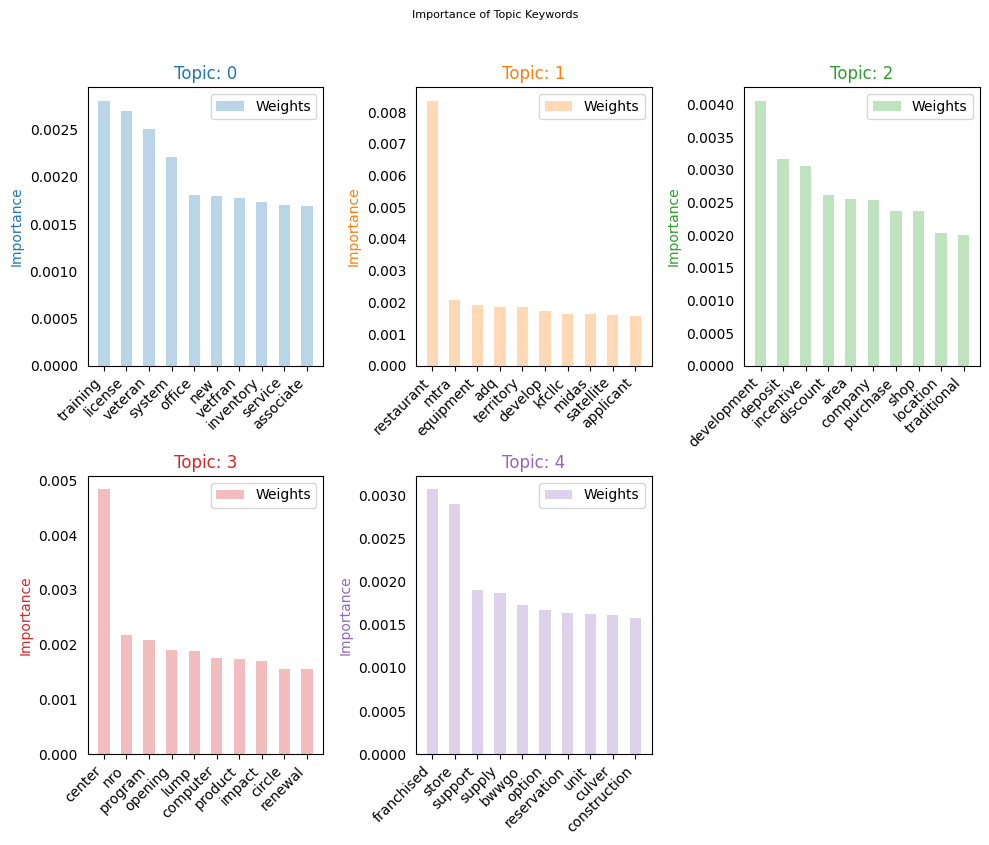

In [62]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Assuming 'topics' is a list of tuples (topic_id, list of (word, weight) tuples)
out = []
for topic, word_wt in topics_dict.items():
    for word, weight in word_wt:
        out.append([word, topic, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

# Plot Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=False, sharey=False, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
  if(i<=num_topics):
    topic_df = df.loc[df.topic_id==i, :]
    topic_df = topic_df.sort_values('importance', ascending=False).head(10)  # Top 10 words
    ax.bar(x='word', height="importance", data=topic_df, color=cols[i], width=0.5, alpha=0.3, label='Weights')
    ax.set_ylabel('Importance', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
    ax.legend(loc='upper right')
fig.delaxes(axes[1, 2])
fig.tight_layout()
fig.suptitle('Importance of Topic Keywords', fontsize=8, y=1.05)
plt.show()


## TFIDF and NMF

In [63]:
from collections import Counter
from sklearn.decomposition import NMF


In [64]:
def preprocess_and_lemmatize(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and len(token) > 2])

df_pr=df_files_orig['Text'].apply(lambda x:preprocess_and_lemmatize(x))

In [65]:
def preprocess_and_filter(texts, n_most_common=10, n_least_common=20):
    # Tokenize the texts
    tokenized_texts = [text.lower().split() for text in texts]

    # Count word frequencies
    word_counts = Counter([word for text in tokenized_texts for word in text])

    # Get the most and least common words
    most_common = set([word for word, _ in word_counts.most_common(n_most_common)])
    least_common = set([word for word, count in word_counts.items() if count <= n_least_common])

    # Filter out most and least common words
    filtered_texts = [
        ' '.join([word for word in text if word not in most_common and word not in least_common])
        for text in tokenized_texts
    ]

    return filtered_texts

fil_texts=preprocess_and_filter(df_pr)

In [66]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=3, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(fil_texts)
nmf_model = NMF(n_components=5, random_state=42)
nmf_output = nmf_model.fit_transform(tfidf_matrix)
# Get feature names (lemmatized words)
feature_names = tfidf_vectorizer.get_feature_names_out()

def get_nmf_topics(nmf_model, feature_names, top_n=10):
    topics = []
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]]
        topics.append(top_words)
    return topics

nmf_topics = get_nmf_topics(nmf_model, tfidf_vectorizer.get_feature_names_out())
print(f"Number of features: {len(feature_names)}")
print(f"Number of topics: {len(nmf_topics)}")
for i,topic in enumerate(nmf_topics):
  print(f'Topic {i+1}: {topic}')

Number of features: 230
Number of topics: 5
Topic 1: ['deposit', 'veteran', 'mtra', 'discount', 'incentive', 'open', 'impact', 'vetfran', 'receive', 'study']
Topic 2: ['center', 'product', 'supply', 'license', 'service', 'market', 'conversion', 'business', 'purchase', 'document']
Topic 3: ['incentive', 'store', 'nro', 'traditional', 'new', 'location', 'deep', 'exist', 'develop', 'march']
Topic 4: ['training', 'franchised', 'support', 'opening', 'develop', 'team', 'attend', 'travel', 'shop', 'personnel']
Topic 5: ['area', 'location', 'purchase', 'company', 'cost', 'term', 'equipment', 'construction', 'affiliate', 'office']


/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [67]:
# Assign topics to documents and count
topic_assignments = nmf_output.argmax(axis=1) + 1
topic_counts = Counter(topic_assignments)
topic_counts

Counter({5: 17, 1: 13, 3: 9, 2: 6, 4: 5})

In [70]:
cm = CoherenceModel(
    topics=nmf_topics,
    texts=data_lemmatized,
    dictionary=filtered_dictionary,
    coherence='c_v'
)

print('Coherence score: ',round(cm.get_coherence(), 5))


Coherence score:  0.46342


In [71]:
# Get dominant topic for each document
dominant_topics = np.argmax(nmf_output , axis=1)

# Count documents per topic
doc_counts = np.bincount(dominant_topics, minlength=len(nmf_topics))

# Create dataframe
topic_df_nmf = pd.DataFrame({
    'Topic': range(len(nmf_topics)),
    'Document_Count': doc_counts,
    'Representative words':nmf_topics,
    'Documents': [np.where(dominant_topics == i)[0].tolist() for i in range(len(nmf_topics))]
})


topic_df_nmf['Documents']=topic_df_nmf['Documents'].apply(lambda x: ', '.join(['File ' + str(el) for el in x]))
topic_df_nmf

,Topic,Document_Count,Representative words,Documents
0,0,13,"[deposit, veteran, mtra, discount, incentive, open, impact, vetfran, receive, study]","File 1, File 2, File 7, File 16, File 17, File 20, File 22, File 23, File 34, File 35, File 41, File 42, File 48"
1,1,6,"[center, product, supply, license, service, market, conversion, business, purchase, document]","File 4, File 13, File 29, File 40, File 46, File 47"
2,2,9,"[incentive, store, nro, traditional, new, location, deep, exist, develop, march]","File 3, File 6, File 12, File 18, File 21, File 26, File 33, File 39, File 44"
3,3,5,"[training, franchised, support, opening, develop, team, attend, travel, shop, personnel]","File 14, File 24, File 32, File 38, File 43"
4,4,17,"[area, location, purchase, company, cost, term, equipment, construction, affiliate, office]","File 0, File 5, File 8, File 9, File 10, File 11, File 15, File 19, File 25, File 27, File 28, File 30, File 31, File 36, File 37, File 45, File 49"


In [72]:
topic_df_nmf.to_csv('NMF_topics.csv', index=False)

In [73]:
def display_topics(model, feature_names, num_top_words):
    word_weights = []
    for topic_idx, topic in enumerate(model.components_):
        topic_dict = {}
        top_indices = topic.argsort()[:-num_top_words - 1:-1]
        for i in top_indices:
            word = feature_names[i]
            weight = topic[i]
            topic_dict[word] = weight
            print(f"{word}: {weight:.4f}")
        word_weights.append(topic_dict)
        print(f"Topic {topic_idx + 1}:")
        for word, weight in topic_dict.items():
            print(f"{word}: {weight:.4f}")
        print()
    return word_weights


nmf_topic_wts=display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

deposit: 0.7839
veteran: 0.4092
mtra: 0.3762
discount: 0.3307
incentive: 0.3258
open: 0.2922
impact: 0.2577
vetfran: 0.2518
receive: 0.2455
study: 0.2417
Topic 1:
deposit: 0.7839
veteran: 0.4092
mtra: 0.3762
discount: 0.3307
incentive: 0.3258
open: 0.2922
impact: 0.2577
vetfran: 0.2518
receive: 0.2455
study: 0.2417

center: 1.2399
product: 0.2983
supply: 0.2953
license: 0.2705
service: 0.1872
market: 0.1223
conversion: 0.1133
business: 0.1068
purchase: 0.1021
document: 0.0952
Topic 2:
center: 1.2399
product: 0.2983
supply: 0.2953
license: 0.2705
service: 0.1872
market: 0.1223
conversion: 0.1133
business: 0.1068
purchase: 0.1021
document: 0.0952

incentive: 0.5434
store: 0.5019
nro: 0.4141
traditional: 0.3455
new: 0.3168
location: 0.2499
deep: 0.2364
exist: 0.2325
develop: 0.2207
march: 0.2127
Topic 3:
incentive: 0.5434
store: 0.5019
nro: 0.4141
traditional: 0.3455
new: 0.3168
location: 0.2499
deep: 0.2364
exist: 0.2325
develop: 0.2207
march: 0.2127

training: 0.6771
franchised: 0.5542


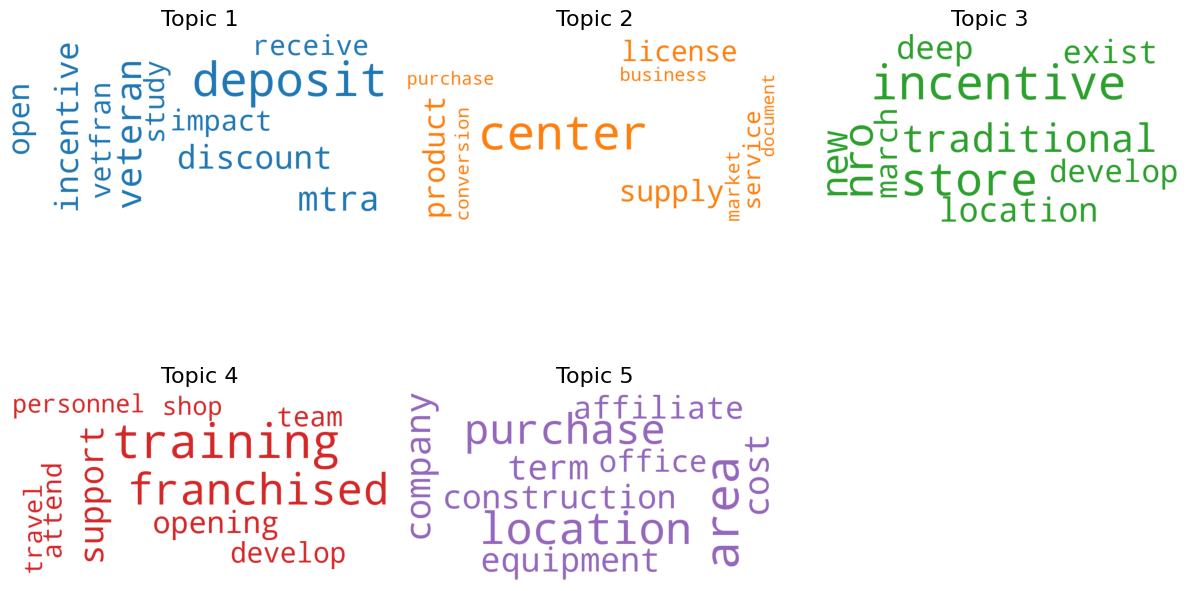

In [74]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
stop_words = set(STOPWORDS)
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=800,
                  height=400,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=0.5)

fig, axes = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < len(nmf_topic_wts):
        topic_words = nmf_topic_wts[i]
        cloud.generate_from_frequencies(topic_words, max_font_size=100)
        ax.imshow(cloud)
        ax.set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        ax.axis('off')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1465599071.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1465599071.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1465599071.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
/var/folders/m1/2ckvnp7j54q8hjtqgnmldg180000gn/T/ipykernel_38245/1465599071.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

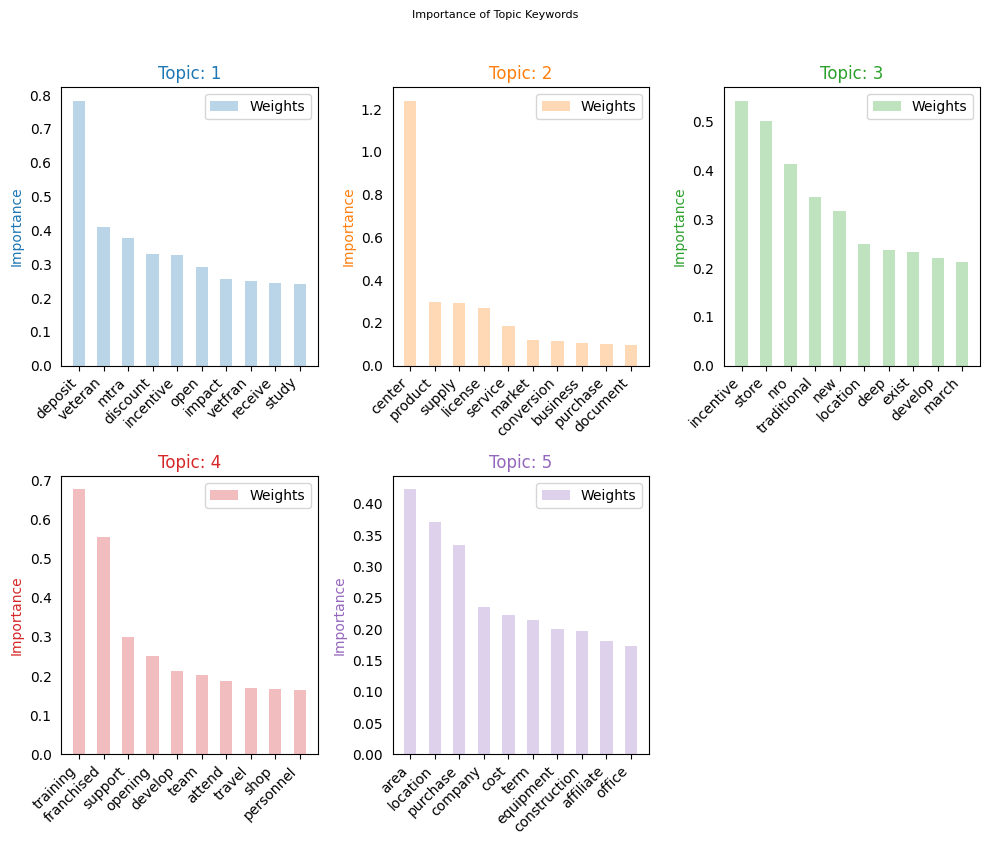

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'topics' is a list of tuples (topic_id, list of (word, weight) tuples)
out = []
for i, topic in enumerate(nmf_topic_wts):
    for word, weight in topic.items():
        out.append([word, i, weight])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance'])

# Plot Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(10,8), sharex=False, sharey=False, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
  if(i<=len(nmf_topic_wts)):
    topic_df = df.loc[df.topic_id==i, :]
    topic_df = topic_df.sort_values('importance', ascending=False).head(10)  # Top 10 words
    ax.bar(x='word', height="importance", data=topic_df, color=cols[i], width=0.5, alpha=0.3, label='Weights')
    ax.set_ylabel('Importance', color=cols[i])
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(topic_df['word'], rotation=45, ha='right')
    ax.legend(loc='upper right')
fig.delaxes(axes[1, 2])
fig.tight_layout()
fig.suptitle('Importance of Topic Keywords', fontsize=8, y=1.05)
plt.show()


## N gram and LDA

In [76]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_ngram = vectorizer_ngram.fit_transform(df_files['Text'])

# Apply LDA for topic modeling
lda_ngram = LDA(n_components=5, random_state=42)
lda_ngram.fit(X_ngram)

# Print topics for N-grams
print("\nTopics from N-grams:")
for idx, topic in enumerate(lda_ngram.components_):
    print(f"Topic #{idx}: ", [vectorizer_ngram.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topics from N-grams:
Topic #0:  ['real estate', 'anytime fitness', 'development fee', 'service center', 'initial fee', 'area development', 'development agreement', 'initial franchise', 'franchise fee', 'franchise agreement']
Topic #1:  ['fee pay', 'disclosure document', 'development agreement', 'area franchisee', 'incentive program', 'development fee', 'training fee', 'franchise agreement', 'initial franchise', 'franchise fee']
Topic #2:  ['traditional restaurant', 'new restaurant', 'midas shop', 'development fee', 'sign franchise', 'incentive program', 'development agreement', 'initial franchise', 'franchise fee', 'franchise agreement']
Topic #3:  ['initial fee', 'real estate', 'restaurant open', 'franchised restaurant', 'incentive program', 'development incentive', 'development agreement', 'franchise agreement', 'initial franchise', 'franchise fee']
Topic #4:  ['training support', 'sign franchise', 'circle business', 'area development', 'franchised restaurant', 'development fee', 'd

In [77]:
from gensim.models import LsiModel
# Training the model with LSI
LSI_model = LsiModel(corpus = corpus, id2word = id2word, num_topics = 5, decay = 0.5)

# Topics
print(LSI_model.print_topics(-1))
print("\nTopics from LSI model:")


[(0, '0.460*"franchise" + 0.460*"fee" + 0.298*"agreement" + 0.279*"restaurant" + 0.224*"development" + 0.221*"initial" + 0.203*"program" + 0.169*"pay" + 0.140*"sign" + 0.135*"incentive"'), (1, '0.580*"restaurant" + -0.386*"center" + 0.280*"development" + 0.251*"agreement" + -0.226*"franchise" + -0.155*"fee" + -0.142*"shop" + -0.141*"midas" + -0.139*"franchisee" + 0.101*"develop"'), (2, '-0.435*"shop" + -0.430*"midas" + 0.378*"center" + 0.311*"fee" + -0.186*"incentive" + -0.178*"marketing" + 0.175*"training" + -0.133*"franchisee" + 0.115*"restaurant" + -0.106*"month"'), (3, '-0.375*"center" + -0.327*"incentive" + 0.265*"franchise" + -0.231*"program" + -0.220*"new" + 0.200*"fee" + 0.189*"purchase" + -0.163*"traditional" + -0.143*"nro" + -0.125*"training"'), (4, '0.386*"development" + -0.316*"location" + 0.264*"initial" + -0.175*"purchase" + 0.168*"area" + -0.157*"traditional" + -0.156*"franchise" + -0.143*"restaurant" + -0.134*"school" + -0.134*"satellite"')]

Topics from LSI model:


/Users/akshararavishankar/miniforge3/lib/python3.12/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


In [78]:
LSI_model.show_topics(formatted=True)

[(0,
  '0.460*"franchise" + 0.460*"fee" + 0.298*"agreement" + 0.279*"restaurant" + 0.224*"development" + 0.221*"initial" + 0.203*"program" + 0.169*"pay" + 0.140*"sign" + 0.135*"incentive"'),
 (1,
  '0.580*"restaurant" + -0.386*"center" + 0.280*"development" + 0.251*"agreement" + -0.226*"franchise" + -0.155*"fee" + -0.142*"shop" + -0.141*"midas" + -0.139*"franchisee" + 0.101*"develop"'),
 (2,
  '-0.435*"shop" + -0.430*"midas" + 0.378*"center" + 0.311*"fee" + -0.186*"incentive" + -0.178*"marketing" + 0.175*"training" + -0.133*"franchisee" + 0.115*"restaurant" + -0.106*"month"'),
 (3,
  '-0.375*"center" + -0.327*"incentive" + 0.265*"franchise" + -0.231*"program" + -0.220*"new" + 0.200*"fee" + 0.189*"purchase" + -0.163*"traditional" + -0.143*"nro" + -0.125*"training"'),
 (4,
  '0.386*"development" + -0.316*"location" + 0.264*"initial" + -0.175*"purchase" + 0.168*"area" + -0.157*"traditional" + -0.156*"franchise" + -0.143*"restaurant" + -0.134*"school" + -0.134*"satellite"')]

## Doc2Vec and KMeans

In [79]:
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans

# --- Step C.1: Doc2Vec Doc/Sentence Embeddings ---
# Tokenizing the text into sentences
documents = [TaggedDocument(words=word_tokenize(text), tags=[str(i)]) for i, text in enumerate(df_files['Text'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=10)

# Generate Doc2Vec embeddings for each sentence
doc2vec_embeddings = [doc2vec_model.dv[str(i)] for i in range(len(df_files['Text']))]

# --- Step C.1a: Apply KMeans for Doc2Vec Clustering ---
# Apply KMeans clustering to Doc2Vec embeddings
kmeans_doc2vec = KMeans(n_clusters=5, random_state=42)
kmeans_doc2vec.fit(doc2vec_embeddings)

# Print clusters from Doc2Vec
print("\nDoc2Vec Clusters (KMeans):")
for i in range(5):
    print(f"Cluster #{i+1}: {[df_files['Text'][j] for j in range(len(df_files['Text'])) if kmeans_doc2vec.labels_[j] == i]}")



Doc2Vec Clusters (KMeans):
Cluster #1: ['item initial fee initial franchise fee pay initial franchise fee sign franchise agreement standard initial franchise fee traditional drivein location nondrivein location non drive location currently standard initial franchise fee non traditional location currently multiply number partial year term year sign franchise agreement agree operate traditional drivein location sonic restaurant franchisee previously operate close year initial franchise fee franchisee good standing initial franchise fee describe fully earn pay refundable circumstance fiscal year end december charge initial franchise fee range development fee development agreement pay nonrefundable development fee multiply number sonic restaurant develop development schedule sign development agreement credit sonic fdd active franchise fee sonic restaurant open development agreement control affiliate pay balance franchise fee control affiliate sign franchise agreement sonic restaurant deve

In [80]:
for i in range(5):
    print(f"Cluster #{i+1}: {[file_list[j] for j in range(len(file_list)) if kmeans_doc2vec.labels_[j] == i]}")


Cluster #1: ['20 Sonic Drive-In.pdf-all_items_item_5.txt', '28 Buffalo Wild Wings.pdf-all_items_item_5.txt']
Cluster #2: ['4 Burger King.pdf-all_items_item_5.txt', '5 Ace Hardware.pdf-all_items_item_5.txt', '7 Subway.pdf-all_items_item_5.txt', '9 Circle K.pdf-all_items_item_5.txt', '10 Taco Bell.pdf-all_items_item_5.txt', "11 Wendy's.pdf-all_items_item_5.txt", '13 REMAX.pdf-all_items_item_5.txt', "14 Dunkin'.pdf-all_items_item_5.txt", '18 Popeyes Louisiana Kitchen.pdf-all_items_item_5.txt', '21 Little Caesars.pdf-all_items_item_5.txt', '27 Jack In The Box.pdf-all_items_item_5.txt', '31 The UPS Store.pdf-all_items_item_5.txt', "36 Denny's.pdf-all_items_item_5.txt", '43 Vavoline Instant Oil Change.pdf-all_items_item_5.txt', '50 Anytime Fitness.pdf-all_items_item_5.txt', '52 Midas.pdf-all_items_item_5.txt']
Cluster #3: ["1 McDonald's.pdf-all_items_item_5.txt", '6 Chick-fil-A.pdf-all_items_item_5.txt', "8 Domino's.pdf-all_items_item_5.txt", '12 Pizza Hut.pdf-all_items_item_5.txt', "22 Papa